In [20]:
# set up autoreload on all files
%load_ext autoreload
%autoreload 2
# step up folder hiearchy to adjust module location for import
import sys
sys.path.insert(0, '..')
%cd ..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\martinholub\git


In [21]:
from glob import glob
from os import path
import numpy as np

In [22]:
import namespace as ns
from viz import viz, plots
from fio import tiff
from fio.name import make_fpath
from masking import fourier_filter

In [32]:
files = glob(ns.HOME + r'\Downloads\data\dev\masking\C\*.tif')

In [33]:
# Load image
head, tail = path.split(files[0])
#tail = '_'.join(tail.split('_')[:-3]) + '.tif' 
impath = path.join(head, tail)
im_ = tiff.load(impath)
#im = tiff.reshape(im, nZ = 35, nT = 20)

# mock fgm fow now
im = im_
fgm = np.ones(im_.shape, dtype = bool)
im.shape

(131, 131, 27, 1)

In [25]:
#% not_run # 2D
# Select viz-plane
if im.shape[3] > 1:
    t = im.shape[3] //2
    im = im[:, :, :, t]
    fgm = fgm[:, :, :, t]
z = im.shape[2] // 2
fgm = fgm[:, :, z]
im = im[:, :, z]
if fgm.sum() == 0 or im.sum() == 0: print('Empty Image')

In [34]:
def trim_array(x, mask = None):
    """Trim array in all dimensions, so as to contain all true values of mask
    
    References
        https://stackoverflow.com/a/54571830
    """
    if mask is None:
        mask = np.where(x != 0)
    bbox = tuple(slice(np.min(idxs), np.max(idxs) + 1) for idxs in mask)
    return x[bbox]

mask = np.where(im != 0)
im = trim_array(im, mask)
fgm = trim_array(fgm, mask)

if fgm.sum() == 0 or im.sum() == 0: print('Empty Image')

3D filtering not available, filtering plane-by-plane.


<AxesSubplot:>

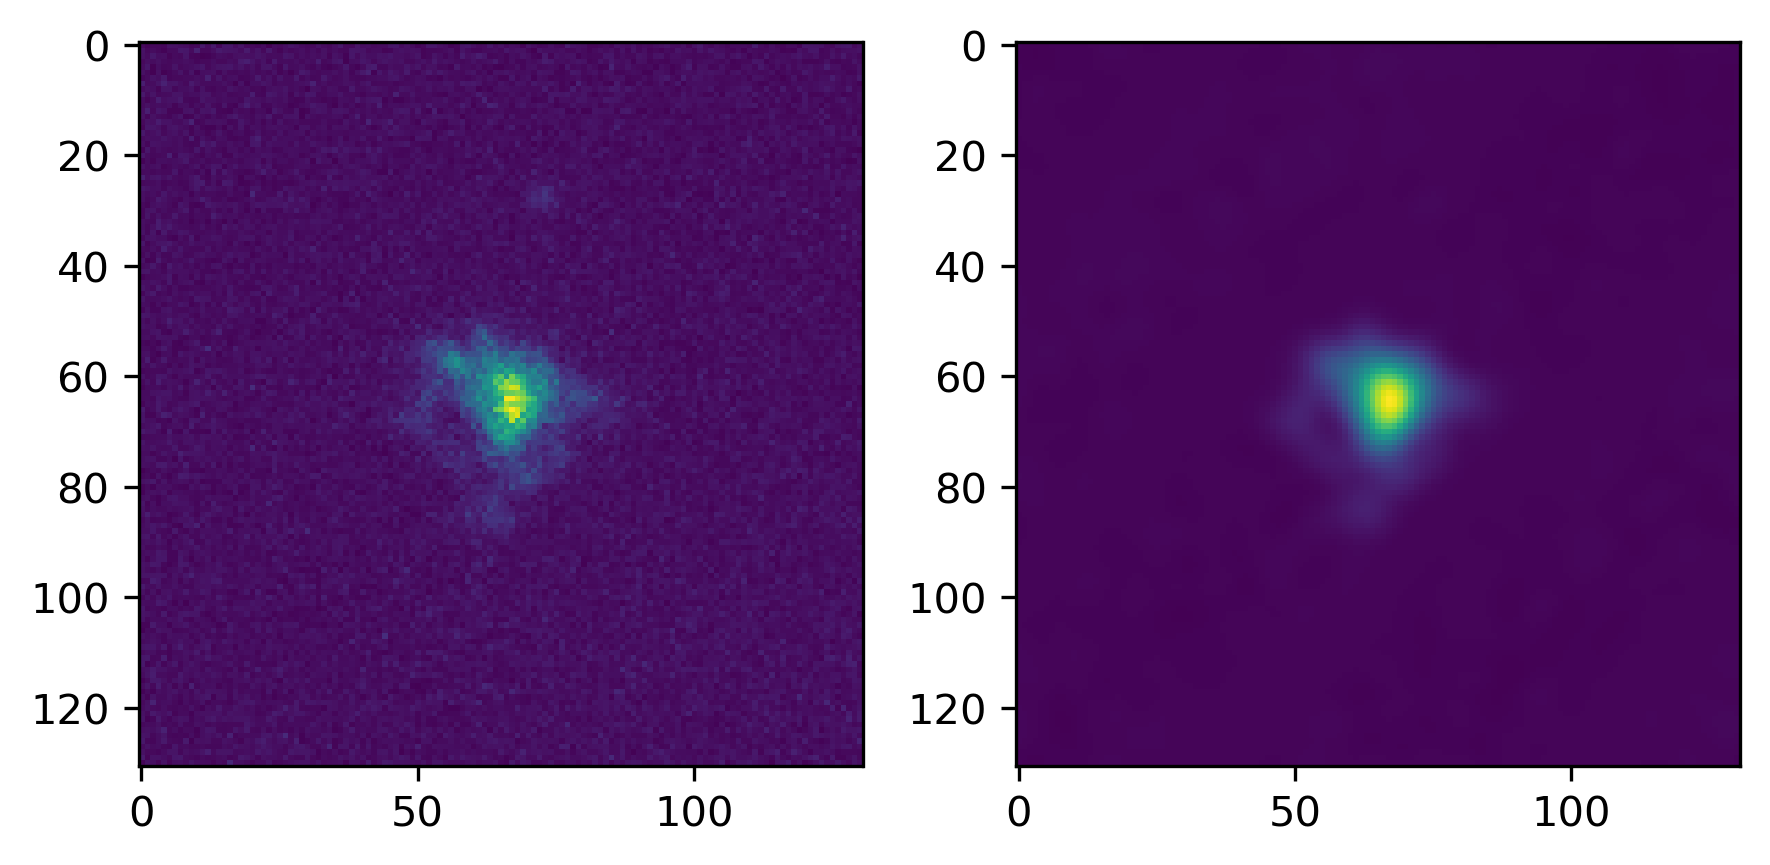

In [42]:
im_filt = fourier_filter(im, 25)

if im.shape[2] > 1:
    z = im.shape[2] // 2 - 2
    im_plot = im[:, :, z]
    im_filt_plot = im_filt[:, :, z]
else:
    im_plot = im; im_filt_plot = im_filt;

fig, ax = plots.make_fig(1, 2)
viz.imshow(ax[0], im_plot, pixel_size = None)
viz.imshow(ax[1], im_filt_plot, pixel_size = None)